In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("Irisdata.csv")

In [11]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

In [13]:
species_classes = df['Species'].unique()
species_to_int = {name: i for i, name in enumerate(species_classes)}
y_int =  df['Species'].map(species_to_int).values

In [14]:
Y = np.eye(len(species_classes))[y_int]

In [15]:
np.random.seed(42)
indexes = np.random.permutation(len(X))
train_size = int(0.8 * len(X))

train_indx = indexes[:train_size]
test_indx = indexes[train_size:]

X_train = X[train_indx]
Y_train = Y[train_indx]
X_test = X[test_indx]
Y_test = Y[test_indx]

In [16]:
class MySoftmaxRegression:
    def __init__(self, learning_rate = 0.1, n_iterations = 1000, normalize = True):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.normalize = normalize

        self.cost_function_history = []

        self.mean_ = None
        self.std_ = None

        self.weights = None
        self.bias = None
        self.coef_ = None

    def _fit_scaler(self, X):
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        self.std_[self.std_ == 0] = 1

    def _transform(self, X):
        return (X - self.mean_) / self.std_

    def softmax(self, Z):
        exp_z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy(self, Y_hat, Y):
        Y_hat = np.clip(Y_hat, 1e-10, 1 - 1e-10)
        return -np.mean(np.sum(Y * np.log(Y_hat), axis=1))

    def fit(self, X, Y):
        if self.normalize:
            self._fit_scaler(X)
            X = self._transform(X)

        m, n = X.shape
        k = Y.shape[1]

        X_new = np.c_[np.ones(m), X]
        
        W = np.random.randn(n + 1, k) * 0.01
        
        for i in range(self.n_iterations):
            Z = np.dot(X_new, W)
            Y_hat = self.softmax(Z)
            
            cost = self.cross_entropy(Y_hat, Y)
            self.cost_function_history.append(cost)
            
            diff = Y_hat - Y
            gradient = np.dot(X_new.T, diff) / m
 
            W = W - self.learning_rate * gradient
            
            if i % 100 == 0:
                print(f"Iteration {i}, Loss = {cost:.4f}")
            
        self.bias = W[0]
        self.weights = W[1:]
        self.coef_ = W.copy()

    def predict_proba(self, X):
        if self.normalize:
            X = self._transform(X)

        Z = np.dot(X, self.weights) + self.bias
        return self.softmax(Z)

    def predict(self, X):
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)

In [17]:
model = MySoftmaxRegression(learning_rate = 0.1, n_iterations = 1000, normalize = True)

model.fit(X_train, Y_train)

Iteration 0, Loss = 1.1023
Iteration 100, Loss = 0.3229
Iteration 200, Loss = 0.2601
Iteration 300, Loss = 0.2228
Iteration 400, Loss = 0.1972
Iteration 500, Loss = 0.1784
Iteration 600, Loss = 0.1641
Iteration 700, Loss = 0.1529
Iteration 800, Loss = 0.1439
Iteration 900, Loss = 0.1364


In [18]:
y_pred = model.predict(X_test)

y_true = np.argmax(Y_test, axis=1)

accuracy = np.mean(y_pred == y_true)

print("Test accuracy:", accuracy)

Test accuracy: 0.9666666666666667


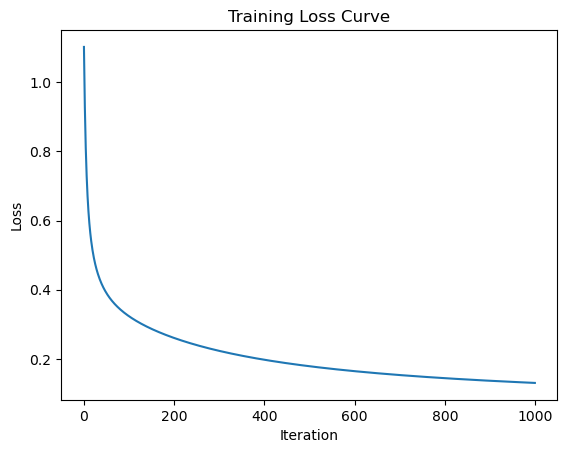

In [19]:
plt.plot(model.cost_function_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [20]:
for lr in [0.01, 0.1, 0.5]:
    m = MySoftmaxRegression(learning_rate=lr, n_iterations=1000, normalize=True)
    m.fit(X_train, Y_train)
    acc = np.mean(m.predict(X_test) == y_true)
    print(f"lr={lr}: accuracy={acc:.3f}")

Iteration 0, Loss = 1.1106
Iteration 100, Loss = 0.6342
Iteration 200, Loss = 0.5101
Iteration 300, Loss = 0.4517
Iteration 400, Loss = 0.4160
Iteration 500, Loss = 0.3910
Iteration 600, Loss = 0.3720
Iteration 700, Loss = 0.3568
Iteration 800, Loss = 0.3441
Iteration 900, Loss = 0.3331
lr=0.01: accuracy=0.933
Iteration 0, Loss = 1.0999
Iteration 100, Loss = 0.3229
Iteration 200, Loss = 0.2602
Iteration 300, Loss = 0.2229
Iteration 400, Loss = 0.1972
Iteration 500, Loss = 0.1784
Iteration 600, Loss = 0.1642
Iteration 700, Loss = 0.1529
Iteration 800, Loss = 0.1439
Iteration 900, Loss = 0.1364
lr=0.1: accuracy=0.967
Iteration 0, Loss = 1.1142
Iteration 100, Loss = 0.1776
Iteration 200, Loss = 0.1298
Iteration 300, Loss = 0.1093
Iteration 400, Loss = 0.0976
Iteration 500, Loss = 0.0900
Iteration 600, Loss = 0.0846
Iteration 700, Loss = 0.0805
Iteration 800, Loss = 0.0773
Iteration 900, Loss = 0.0747
lr=0.5: accuracy=1.000


In [21]:
for itr in [100, 500, 1000]:
    m = MySoftmaxRegression(learning_rate=0.1, n_iterations=itr, normalize=True)
    m.fit(X_train, Y_train)
    acc = np.mean(m.predict(X_test) == y_true)
    print(f"Iterations={itr}: accuracy={acc:.3f}")

Iteration 0, Loss = 1.1002
Iterations=100: accuracy=0.933
Iteration 0, Loss = 1.0976
Iteration 100, Loss = 0.3223
Iteration 200, Loss = 0.2597
Iteration 300, Loss = 0.2225
Iteration 400, Loss = 0.1969
Iterations=500: accuracy=0.967
Iteration 0, Loss = 1.1175
Iteration 100, Loss = 0.3231
Iteration 200, Loss = 0.2603
Iteration 300, Loss = 0.2229
Iteration 400, Loss = 0.1972
Iteration 500, Loss = 0.1784
Iteration 600, Loss = 0.1642
Iteration 700, Loss = 0.1529
Iteration 800, Loss = 0.1439
Iteration 900, Loss = 0.1364
Iterations=1000: accuracy=0.967
